In [1]:
from IPython.display import clear_output
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from matplotlib import rcParams
import string
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

c:\Users\jimmy\Documents\GitHub\Financial News Scraping\venv\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


### Open JSON File

In [3]:
df = pd.read_json('news_data_1pp.json')

In [4]:
df.head(5)

,link,title,summary,text,top_img,publish_date,meta_keywords,tags
0,https://finance.yahoo.com/news/cloverleaf-netw...,Cloverleaf Networks Acquires Ryver to Enhance ...,The acquisition resulted from extensive strate...,"SCOTTSDALE, Ariz., Oct. 18, 2022 /PRNewswire/ ...",https://media.zenfs.com/en/prnewswire.com/0e02...,None,[],"[America: Back in Business, Economic News, Sto..."
1,https://finance.yahoo.com/news/ingalls-shipbui...,Ingalls Shipbuilding Successfully Completes Ac...,Guided missile destroyer Lenah Sutcliffe Higbe...,"Huntington Ingalls Industries, Inc.\n\nGuided ...",https://s.yimg.com/ny/api/res/1.2/uuOseaXa15DX...,None,[],"[America: Back in Business, Economic News, Sto..."
2,https://finance.yahoo.com/news/stoneridge-inc-...,"STONERIDGE, INC. TO BROADCAST ITS THIRD-QUARTE...","NOVI, Mich., Oct. 20, 2022 /PRNewswire/ -- Sto...","NOVI, Mich., Oct. 20, 2022 /PRNewswire/ -- Sto...",https://media.zenfs.com/en/prnewswire.com/3594...,None,[],"[America: Back in Business, Economic News, Sto..."
3,https://finance.yahoo.com/news/bruised-emergin...,Volatile Brazil Is Lone Bull Case for Bruised ...,“This is quite a difficult year for emerging m...,(Bloomberg) -- As volatility batters even the ...,https://s.yimg.com/ny/api/res/1.2/d1RKFY6vPb2s...,None,[],"[America: Back in Business, Economic News, Sto..."
4,https://finance.yahoo.com/news/civitas-resourc...,Civitas Resources (CIVI) Gains But Lags Market...,"In the latest trading session, Civitas Resourc...","In the latest trading session, Civitas Resourc...",https://media.zenfs.com/en/zacks.com/078b2d951...,None,[],"[America: Back in Business, Economic News, Sto..."


### Number of records, words and types in the corpus 

In [5]:
# Creating corpuses for headlines and text
titles_corpus = []
titles = df['title'].str.split()
titles = titles.values.tolist()
titles_corpus = [word.lower() for i in titles for word in i]

titles_corpus_dict = defaultdict(int)
for word in titles_corpus:
    titles_corpus_dict[word] += 1


text_corpus = []
text = df['text'].str.split()
text = text.values.tolist()
text_corpus = [word.lower() for i in text for word in i]

text_corpus_dict = defaultdict(int)
for word in text_corpus:
    text_corpus_dict[word] += 1


#### Number of records

In [6]:
len(df)

10843

#### Number of words

In [7]:
print("The number of words in titles:", len(titles_corpus))
print("The number of words in articles:", len(text_corpus))


The number of words in titles: 128947
The number of words in articles: 7742347


Average number of words in headline is 11.89

11.8921885087153

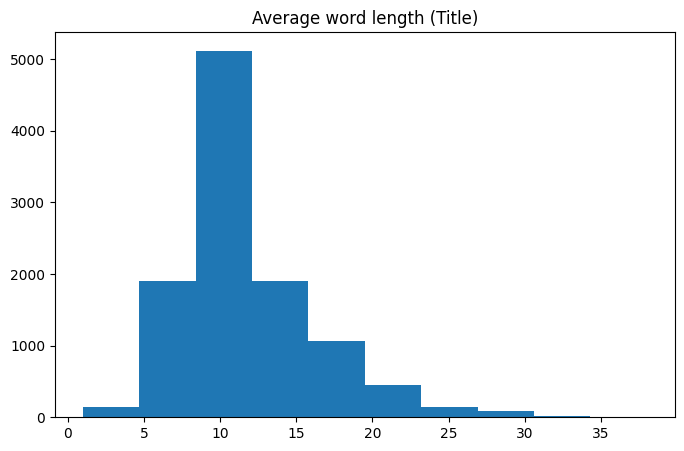

In [8]:
title_length = df['title'].str.split().map(lambda x:len(x))
plt.figure(figsize=(8,5))
plt.title("Average word length (Title)")
plt.hist(title_length)
np.mean(title_length)

(array([1.440e+02, 1.898e+03, 5.119e+03, 1.900e+03, 1.069e+03, 4.500e+02,
        1.490e+02, 9.000e+01, 2.000e+01, 4.000e+00]),
 array([ 1. ,  4.7,  8.4, 12.1, 15.8, 19.5, 23.2, 26.9, 30.6, 34.3, 38. ]),
 <BarContainer object of 10 artists>)

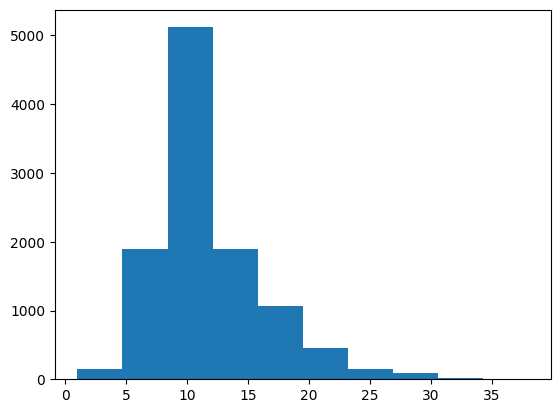

In [9]:
plt.hist(title_length)

Average text length of ~714

714.0410403024993

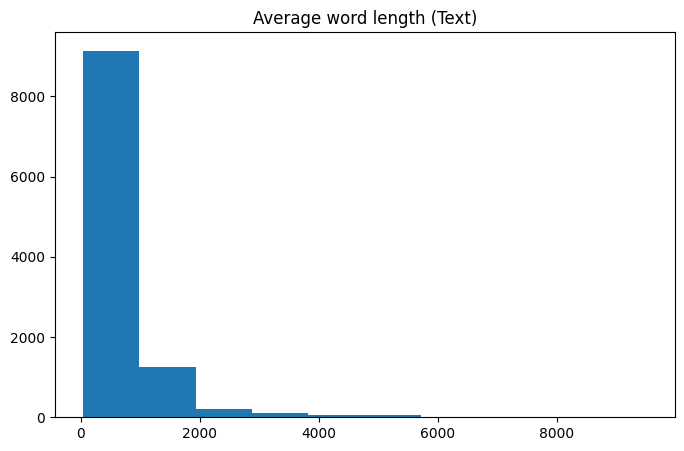

In [10]:
text_length = df['text'].str.split().map(lambda x:len(x))
plt.figure(figsize=(8,5))
plt.title("Average word length (Text)")
plt.hist(text_length)
np.mean(text_length)

#### Number of Types in the corpus - unique words

In [11]:
print("The number of unique words in titles:", len(titles_corpus_dict.keys()))
print("The number of unique words in articles:", len(text_corpus_dict.keys()))


The number of unique words in titles: 22925
The number of unique words in articles: 311856


Let us analyse the top n words in title and text 

<BarContainer object of 10 artists>

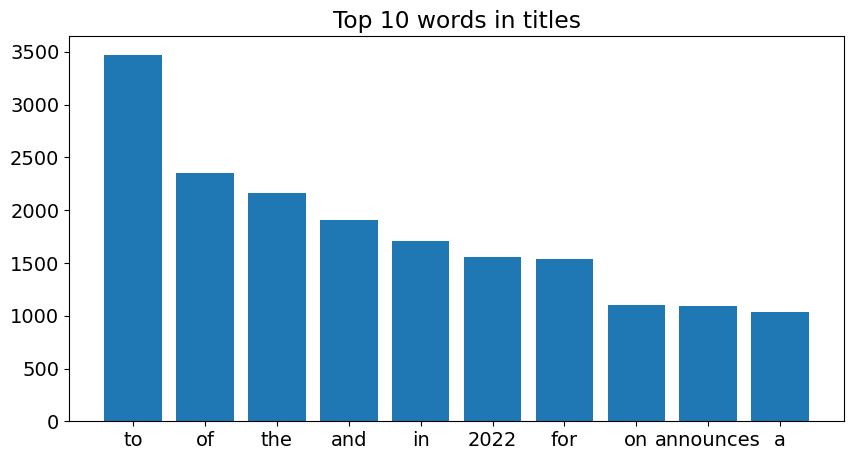

In [12]:
# Top words in title 
top_n_words_title = sorted(titles_corpus_dict.items(), key=lambda x: x[1], reverse=True)[:10]
x,y = zip(*top_n_words_title)
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 14
plt.title("Top 10 words in titles")
plt.bar(x,y)

<BarContainer object of 10 artists>

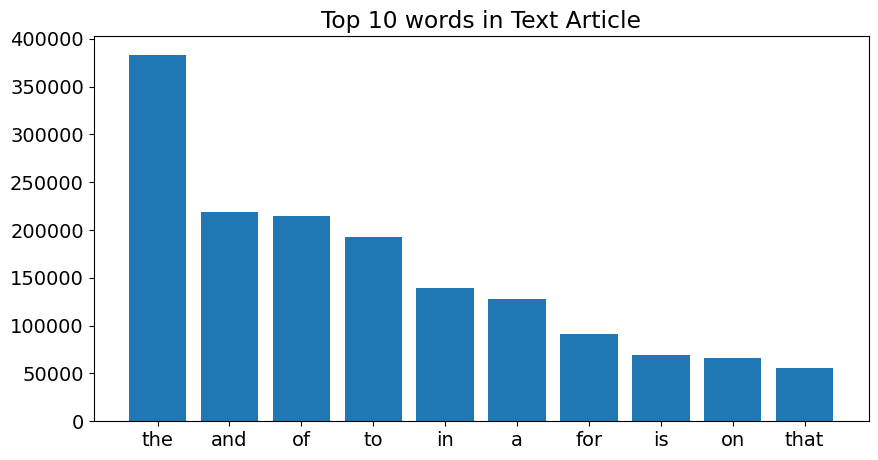

In [13]:
# Top words in corpus 
top_n_words_text = sorted(text_corpus_dict.items(), key=lambda x: x[1], reverse=True)[:10]
x,y = zip(*top_n_words_text)
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 14
plt.title("Top 10 words in Text Article")
plt.bar(x,y)

Let us analyse the top N stopwords in headlines and articles 

In [14]:
stop = stopwords.words('english')

<BarContainer object of 10 artists>

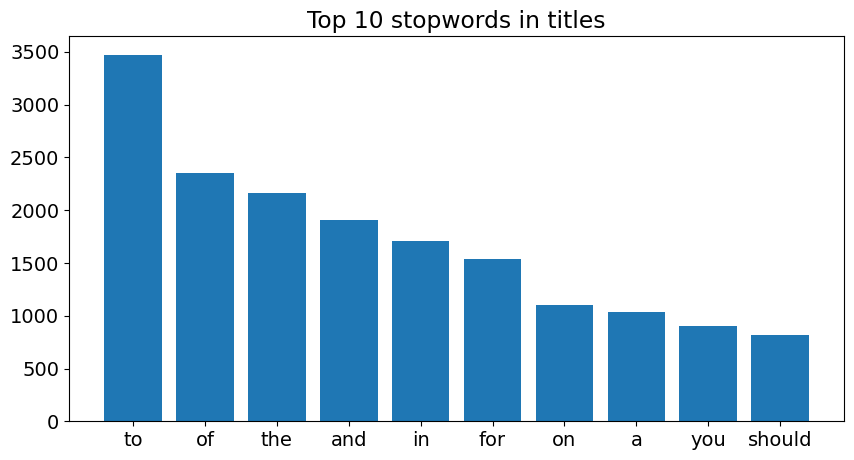

In [15]:
titles_corpus_stopwords_dict = defaultdict(int)
for word in titles_corpus:
    if word in stop:
        titles_corpus_stopwords_dict[word] += 1

top_n_stopwords_titles = sorted(titles_corpus_stopwords_dict.items(), key=lambda x: x[1], reverse=True)[:10]
x,y = zip(*top_n_stopwords_titles)
plt.figure(figsize=(10,5))
plt.title("Top 10 stopwords in titles")
plt.bar(x,y)

<BarContainer object of 10 artists>

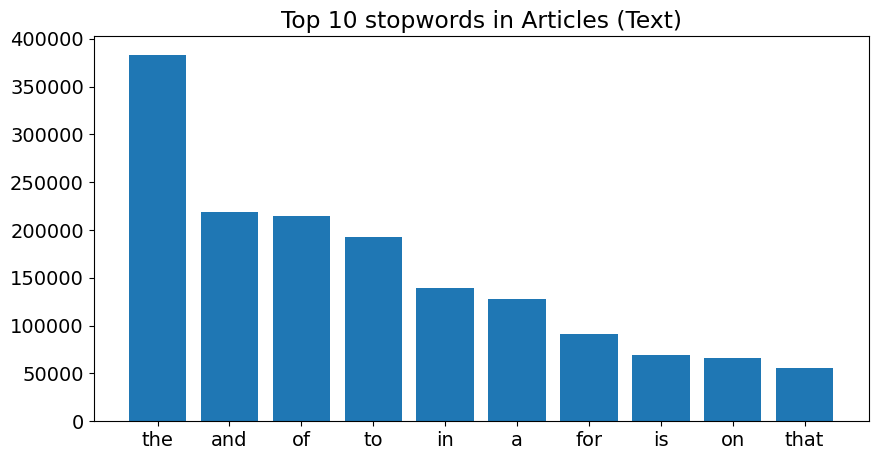

In [16]:
text_corpus_stopwords_dict = defaultdict(int)
for word in text_corpus:
    if word in stop:
        text_corpus_stopwords_dict[word] += 1

top_n_stopwords_text = sorted(text_corpus_stopwords_dict.items(), key=lambda x: x[1], reverse=True)[:10]
x,y = zip(*top_n_stopwords_text)
plt.figure(figsize=(10,5))
plt.title("Top 10 stopwords in Articles (Text)")
plt.bar(x,y)

#### As we see there is an overlap in the top words for titles and text with stopwords - hence we shall remove these stopwords and punctuation to see what other words occur frequently in titles and text 

We will be removing all the escape sequences, urls, email address, and punctuation (except finance related punctuation - "$ %"  )

In [17]:
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\n', r' ', text) 
    text = re.sub(r'\t', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = re.sub(r'\S*@\S*\s?', r'<EMAIL>', text)
    text = text.translate(str.maketrans('','', '!"#&\'()*+,-/:;<=>?@[\\]^_`{|}~'))   
    text = text.lower()
    return text

def removeStopwords(text):
    text = ' '.join([word for word in text.split() if word not in stop])
    return text

In [18]:
# Create cleaned corpus of titles and text

# Titles
titles_non_stopwords_cleaned = []
titles_non_stopwords_corpus_cleaned = []
titles_corpus_non_stopwords_dict = defaultdict(int)

titles_non_stopwords_cleaned = df['title'].apply(cleanText).apply(removeStopwords)

titles_non_stopwords_corpus_cleaned = titles_non_stopwords_cleaned.str.split().values.tolist()
titles_non_stopwords_corpus_cleaned = [word for i in titles_non_stopwords_corpus_cleaned for word in i]

for word in titles_non_stopwords_corpus_cleaned:
    titles_corpus_non_stopwords_dict[word] += 1


# Texts
text_non_stopwords_cleaned = []
text_non_stopwords_corpus_cleaned = []
text_corpus_non_stopwords_dict = defaultdict(int)

text_non_stopwords_cleaned = df['text'].apply(cleanText).apply(removeStopwords)

text_non_stopwords_corpus_cleaned = text_non_stopwords_cleaned.str.split().values.tolist()
text_non_stopwords_corpus_cleaned = [word for i in text_non_stopwords_corpus_cleaned for word in i]

for word in text_non_stopwords_corpus_cleaned:
    text_corpus_non_stopwords_dict[word] += 1

c:\Users\jimmy\Documents\GitHub\Financial News Scraping\venv\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Text(0.5, 1.0, 'Top 30 occuring words in titles')

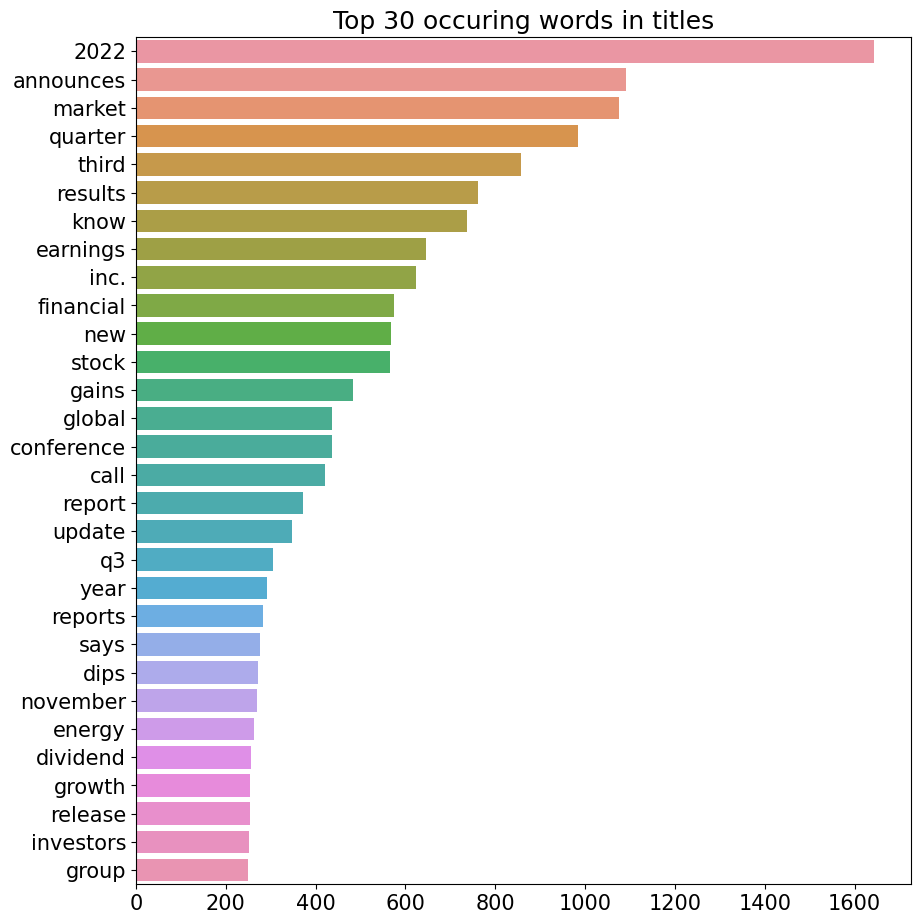

In [19]:
top_n_non_stopwords_titles = sorted(
    titles_corpus_non_stopwords_dict.items(), key=lambda x: x[1], reverse=True)[:30]

x, y = list(map(list, zip(*top_n_non_stopwords_titles)))
# figure size in inches
rcParams['figure.figsize'] = 10, 11
rcParams['font.size'] = 15
sns.barplot(x=y,y=x).set_title("Top 30 occuring words in titles")

Text(0.5, 1.0, 'Top 30 occuring words in texts')

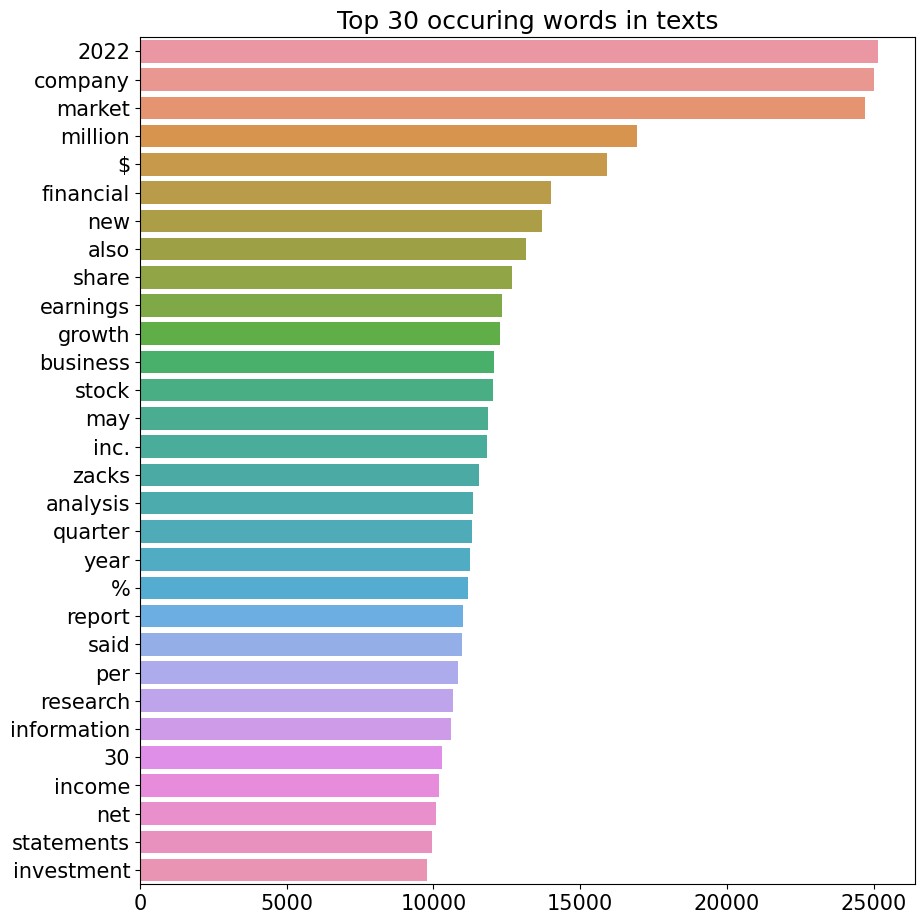

In [20]:
top_n_non_stopwords_text = sorted(
    text_corpus_non_stopwords_dict.items(), key=lambda x: x[1], reverse=True)[:30]

x, y = list(map(list, zip(*top_n_non_stopwords_text)))
# figure size in inches
rcParams['figure.figsize'] =  10,11
rcParams['font.size'] = 15
sns.barplot(x=y,y=x).set_title("Top 30 occuring words in texts")

Visualising the most common words in title 

c:\Users\jimmy\Documents\GitHub\Financial News Scraping\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\jimmy\Documents\GitHub\Financial News Scraping\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\jimmy\Documents\GitHub\Financial News Scraping\venv\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\jimmy\Documents\GitHub\Financial News Scraping\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: texts

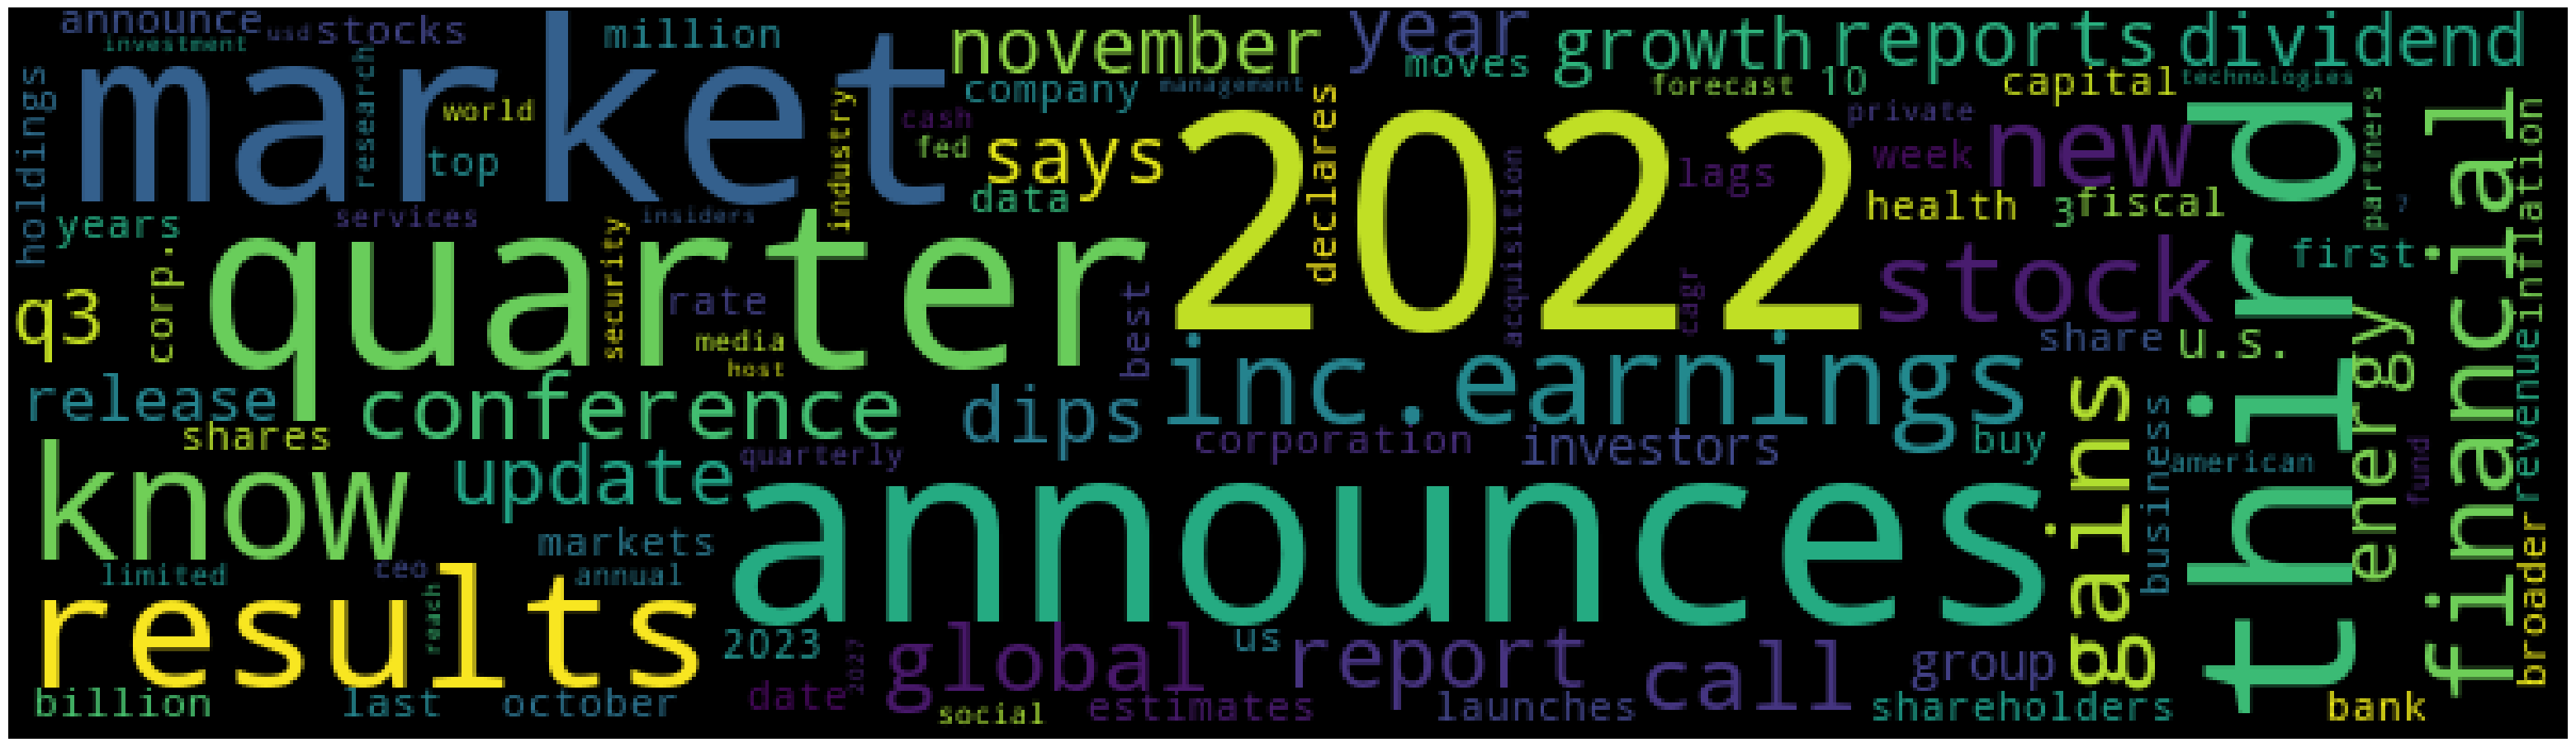

In [21]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width= 700, height = 200, max_words=100,
                      random_state=1, background_color='black', colormap='viridis_r',
                      collocations=False, stopwords = STOPWORDS)
wordcloud.generate_from_frequencies(frequencies=titles_corpus_non_stopwords_dict)                      
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

c:\Users\jimmy\Documents\GitHub\Financial News Scraping\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\jimmy\Documents\GitHub\Financial News Scraping\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\jimmy\Documents\GitHub\Financial News Scraping\venv\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\jimmy\Documents\GitHub\Financial News Scraping\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: texts

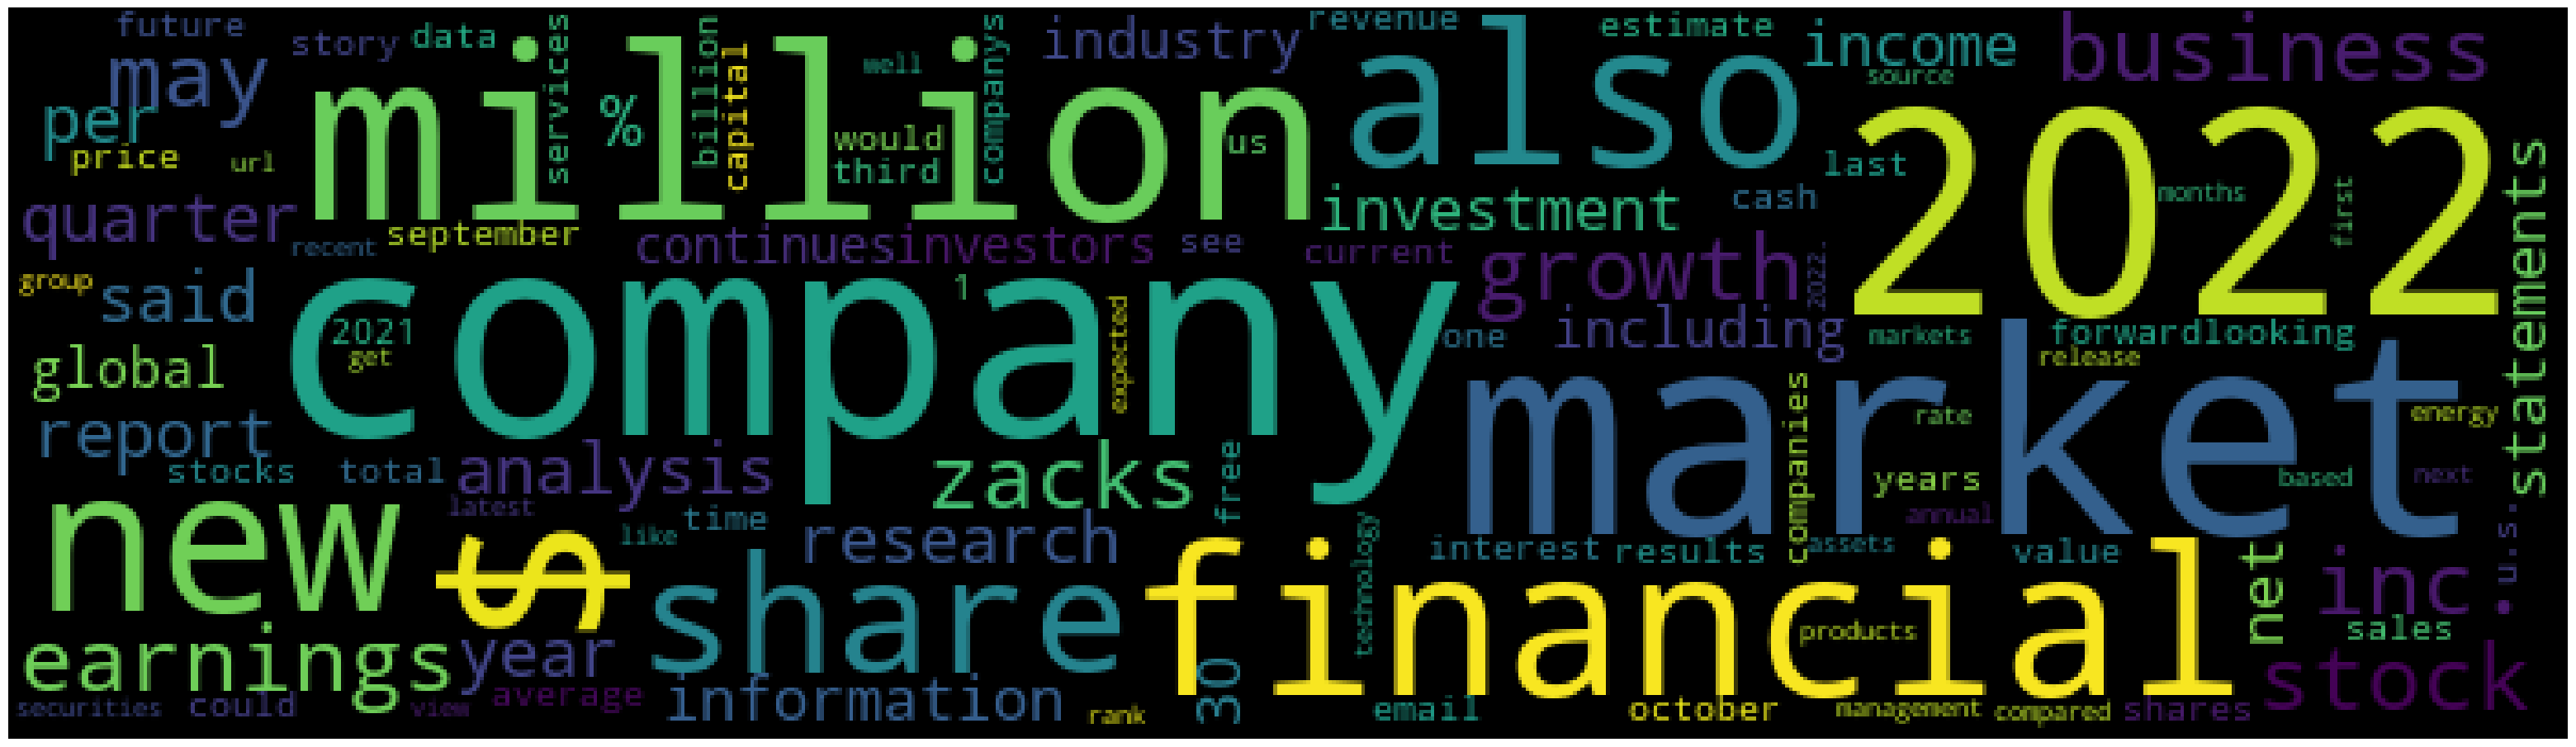

In [22]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width= 700, height = 200, max_words=100,
                      random_state=1, background_color='black', colormap='viridis_r',
                      collocations=False, stopwords = STOPWORDS)
wordcloud.generate_from_frequencies(frequencies=text_corpus_non_stopwords_dict)                      
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

### N-gram Exploration


In [23]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
## visualising top n-grams

def get_top_word_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_word_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#### Top Bigram and Trigram for titles

Text(0.5, 1.0, 'Top 20 bigram for title')

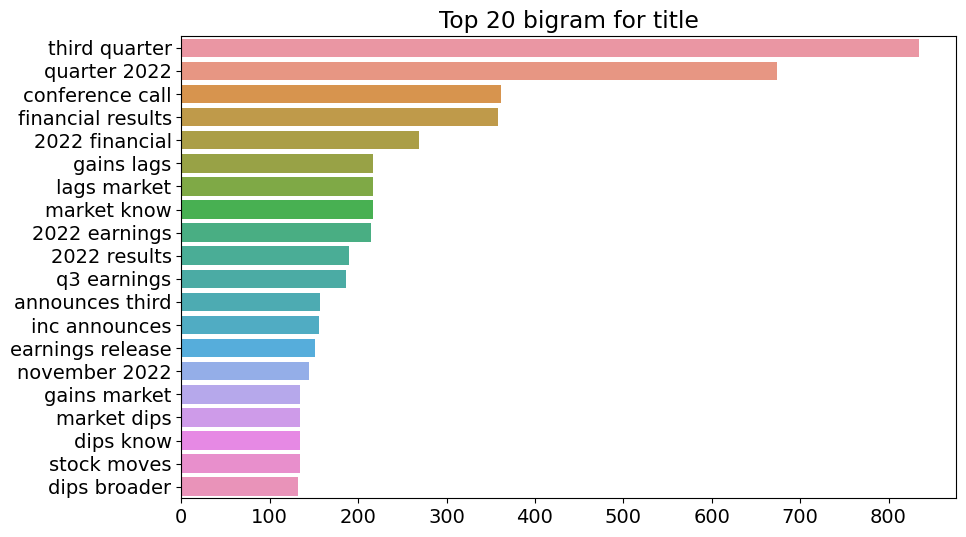

In [25]:
plt.figure(figsize=(10, 6))
top_title_bigrams = get_top_word_bigrams(titles_non_stopwords_cleaned)[:20]
x, y = map(list, zip(*top_title_bigrams))
# rcParams['figure.figsize'] =  25,10
rcParams['font.size'] = 14
sns.barplot(x=y, y=x).set_title("Top 20 bigram for title")


Text(0.5, 1.0, 'Top 20 trigram for title')

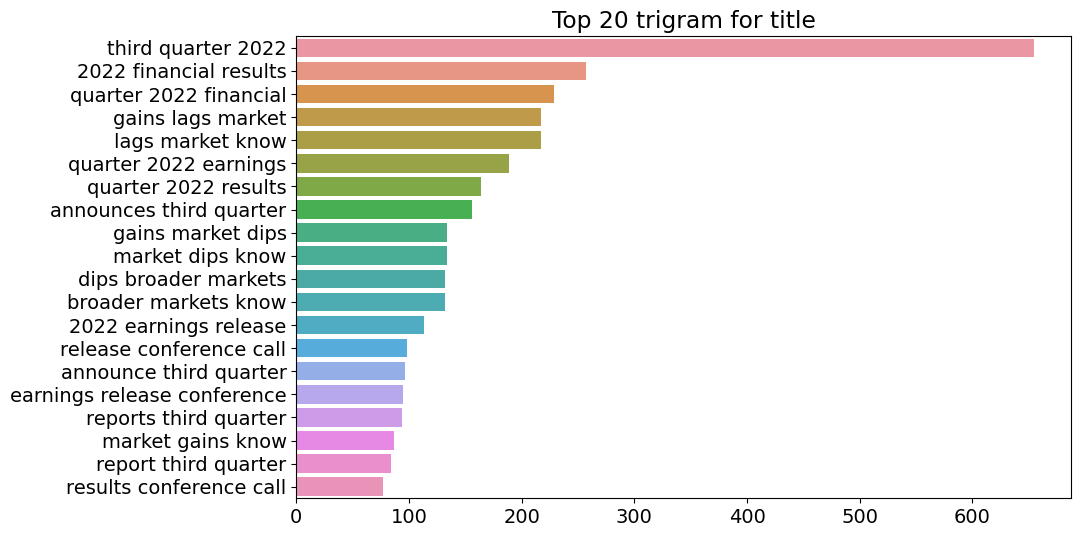

In [26]:
plt.figure(figsize=(10, 6))
top_title_trigrams = get_top_word_trigrams(titles_non_stopwords_cleaned)[:20]
x, y = map(list, zip(*top_title_trigrams))
rcParams['font.size'] = 14
sns.barplot(x=y, y=x).set_title("Top 20 trigram for title")


#### Top Bigram for text


Text(0.5, 1.0, 'Top 20 bigram for text')

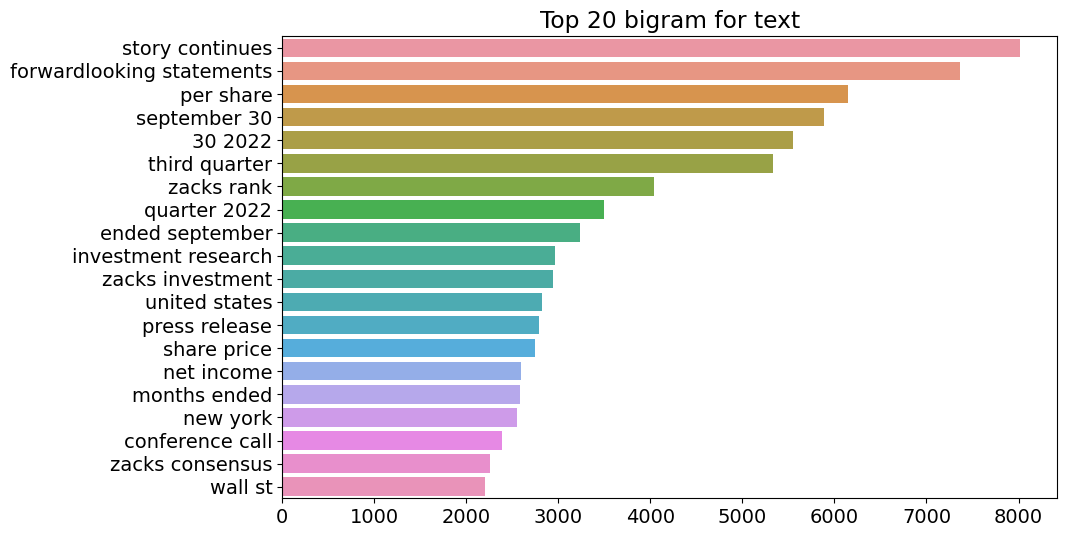

In [27]:
plt.figure(figsize=(10, 6))
top_text_bigrams = get_top_word_bigrams(text_non_stopwords_cleaned)[:20]
x, y = map(list, zip(*top_text_bigrams))
rcParams['font.size'] = 14
sns.barplot(x=y, y=x).set_title("Top 20 bigram for text")


Text(0.5, 1.0, 'Top 20 trigram for text')

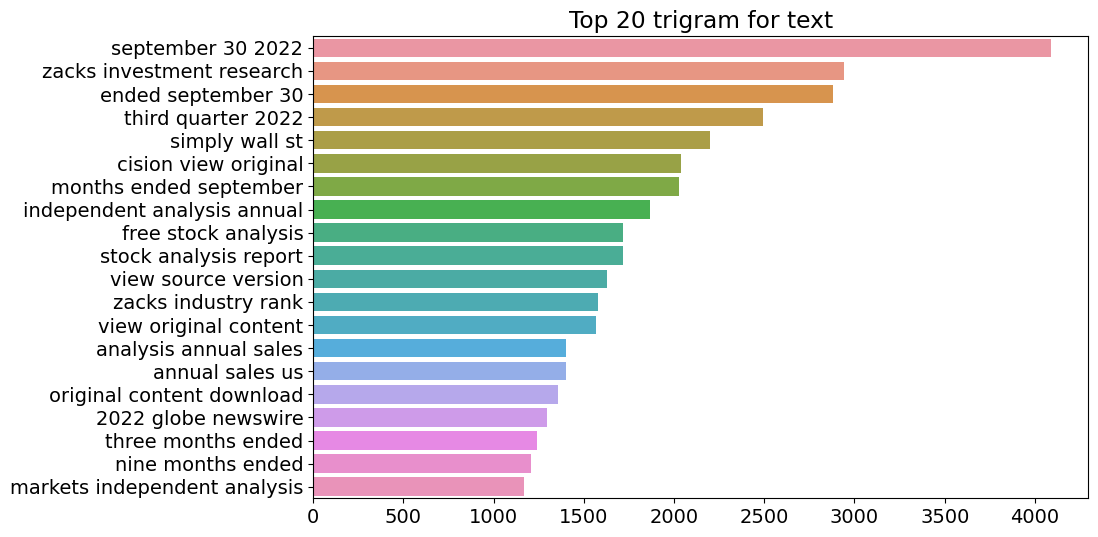

In [28]:
plt.figure(figsize=(10, 6))
top_text_trigrams = get_top_word_trigrams(text_non_stopwords_cleaned)[:20]
x, y = map(list, zip(*top_text_trigrams))
rcParams['font.size'] = 14
sns.barplot(x=y, y=x).set_title("Top 20 trigram for text")
